Project Description:
The Employee Attrition Prediction and Analysis project uses machine learning to predict which employees are most likely to leave a company.
It includes all steps of the data science process, such as collecting, analyzing, and modeling data, to find important factors that affect employee turnover.

Purpose:
The main purpose of this project is to help companies understand why employees leave and to predict who might leave soon.

This helps organizations take early actions to improve employee satisfaction, reduce turnover, and save costs related to hiring and training new staff.

# Importing Libraries

In [829]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import seaborn as sns

# Load Dataset

In [830]:
df = pd.read_csv(r"WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Exploratory Data Analysis (EDA)

In [831]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [832]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1450,35,No,Travel_Rarely,1146,Human Resources,26,4,Life Sciences,1,2040,...,3,80,0,9,2,3,9,0,1,7
688,19,Yes,Travel_Rarely,419,Sales,21,3,Other,1,959,...,2,80,0,1,3,4,1,0,0,0
1159,39,No,Travel_Frequently,711,Research & Development,4,3,Medical,1,1633,...,4,80,0,10,2,1,9,2,3,8
203,40,No,Travel_Rarely,905,Research & Development,19,2,Medical,1,281,...,3,80,1,15,2,4,7,2,3,7
588,50,No,Travel_Rarely,691,Research & Development,2,3,Medical,1,815,...,4,80,0,30,3,3,4,3,0,3


In [833]:
shape = df.shape
missing = df.isnull().sum().sum()
duplicate = df.duplicated().sum()

print("Rows:", shape[0])
print("Columns:", shape[1])
print("Missing values:", missing)
print("Duplicate values:",duplicate)

Rows: 1470
Columns: 35
Missing values: 0
Duplicate values: 0


**There are no missing values or duplicate rows in the dataset.**



In [834]:
#Show the number of unique observations for each column
df.nunique()

,0
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


In [835]:
num_cols = df.select_dtypes(include=['int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [836]:
for i in cat_cols:
    print("unique values of:",i,set(df[i]))

unique values of: Attrition {'Yes', 'No'}
unique values of: BusinessTravel {'Travel_Frequently', 'Non-Travel', 'Travel_Rarely'}
unique values of: Department {'Sales', 'Research & Development', 'Human Resources'}
unique values of: EducationField {'Other', 'Marketing', 'Medical', 'Life Sciences', 'Human Resources', 'Technical Degree'}
unique values of: Gender {'Female', 'Male'}
unique values of: JobRole {'Sales Representative', 'Healthcare Representative', 'Research Director', 'Manager', 'Laboratory Technician', 'Human Resources', 'Manufacturing Director', 'Sales Executive', 'Research Scientist'}
unique values of: MaritalStatus {'Married', 'Divorced', 'Single'}
unique values of: Over18 {'Y'}
unique values of: OverTime {'Yes', 'No'}


**Columns types**

In [837]:
print("Numerical:", list(num_cols))
print("Categorical:", list(cat_cols))

Numerical: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Categorical: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


**It contains 9 categorical and 26 numerical columns.**

## Summary stat of numeric variables

In [838]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


## Summary stat of categorical variables

In [839]:
cat_col = df.select_dtypes(include=['object'] ).columns
df[cat_col].describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [840]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"\nColumn: {col}")

    ct = pd.crosstab(df[col], df['Attrition']).reset_index()
    display(ct)


Column: Attrition


Attrition,Attrition,No,Yes
0,No,1233,0
1,Yes,0,237



Column: BusinessTravel


Attrition,BusinessTravel,No,Yes
0,Non-Travel,138,12
1,Travel_Frequently,208,69
2,Travel_Rarely,887,156



Column: Department


Attrition,Department,No,Yes
0,Human Resources,51,12
1,Research & Development,828,133
2,Sales,354,92



Column: EducationField


Attrition,EducationField,No,Yes
0,Human Resources,20,7
1,Life Sciences,517,89
2,Marketing,124,35
3,Medical,401,63
4,Other,71,11
5,Technical Degree,100,32



Column: Gender


Attrition,Gender,No,Yes
0,Female,501,87
1,Male,732,150



Column: JobRole


Attrition,JobRole,No,Yes
0,Healthcare Representative,122,9
1,Human Resources,40,12
2,Laboratory Technician,197,62
3,Manager,97,5
4,Manufacturing Director,135,10
5,Research Director,78,2
6,Research Scientist,245,47
7,Sales Executive,269,57
8,Sales Representative,50,33



Column: MaritalStatus


Attrition,MaritalStatus,No,Yes
0,Divorced,294,33
1,Married,589,84
2,Single,350,120



Column: Over18


Attrition,Over18,No,Yes
0,Y,1233,237



Column: OverTime


Attrition,OverTime,No,Yes
0,No,944,110
1,Yes,289,127


# Exploratory Data Analysis

> Add blockquote



# OUTLIER DETECTION FOR NUMERICAL FEATURES

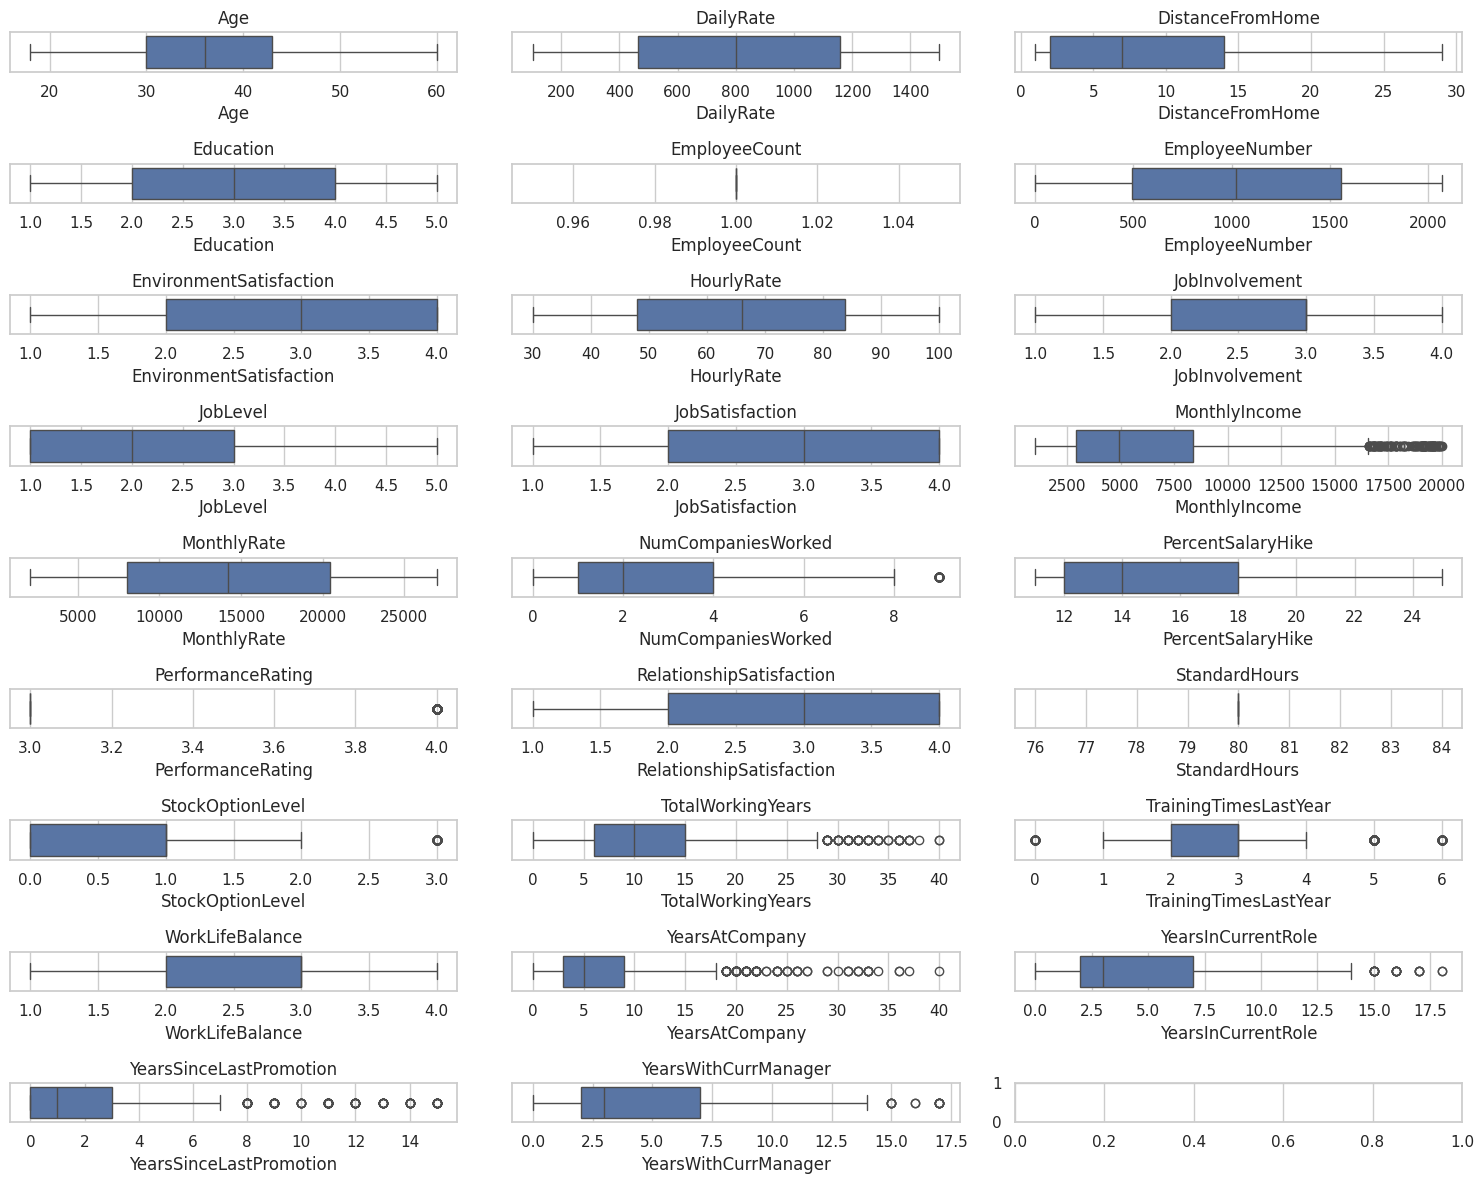

In [841]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
fig, axes = plt.subplots(len(numerical_cols)//3 + 1, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=col, ax=axes[idx])
    axes[idx].set_title(f'{col}')

plt.tight_layout()
plt.show()

In [842]:
att_counts = df['Attrition'].value_counts()
att_props = df['Attrition'].value_counts(normalize=True) * 100
colors = ['#2E86C1', '#E74C3C']

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "bar"}, {"type": "pie"}]],
    subplot_titles=("Attrition Count", "Attrition Distribution (%)")
)

fig.add_trace(
    go.Bar(
        x=att_counts.index,
        y=att_counts.values,
        text=att_counts.values,
        textposition='outside',
        marker_color=colors,
        marker_line_color='white',
        marker_line_width=1.5,
        name='Attrition Count',
        opacity=0.9
    ),
    row=1, col=1
)

fig.add_trace(
    go.Pie(
        labels=att_props.index,
        values=att_props.values,
        textinfo='label+percent',
        marker=dict(colors=colors, line=dict(color='white', width=1.5)),
        name='Attrition Distribution',
        hole=0.3
    ),
    row=1, col=2
)

fig.update_layout(
    title=dict(
        text='Employee Attrition',
        x=0.5,
        font=dict(size=22, family='DejaVu Sans, Arial, sans-serif', color='#333')
    ),
    template='plotly_white',
    plot_bgcolor='#F9FAFB',
    paper_bgcolor='#F9FAFB',
    font=dict(family='DejaVu Sans, Arial, sans-serif', size=11, color='#2E2E2E'),
    showlegend=False,
    height=500,
    width=900,
)

fig.show()

In [843]:
# Departments where employees left ---
dept_attrition = df[df['Attrition'] == 'Yes']['Department'].value_counts()

colors = ['#2E86C1', '#E74C3C', '#1E9D88']

fig = go.Figure(go.Pie(
    labels=dept_attrition.index,
    values=dept_attrition.values,
    hole=0.4,
    marker=dict(colors=colors, line=dict(color='white', width=2)),
    textinfo='label+percent',
    textfont=dict(size=12, family='DejaVu Sans, Arial, sans-serif', color='#2E2E2E'),
    pull=[0.05 if i == 0 else 0 for i in range(len(dept_attrition))]
))

fig.update_layout(
    title=dict(
        text='Attrition by Department',
        x=0.5,
        font=dict(size=22, family='DejaVu Sans, Arial, sans-serif', color='#333')
    ),
    template='plotly_white',
    paper_bgcolor='#F9FAFB',
    plot_bgcolor='#F9FAFB',
    showlegend=False,
    height=500,
    width=600,
    margin=dict(t=80, b=40, l=40, r=40)
)
fig.show()

In [844]:
dept_attrition = df.groupby(['Department', 'Attrition']).size().reset_index(name='Count')

colors = {'Yes': '#E74C3C', 'No': '#2E86C1'}

fig = px.bar(
    dept_attrition,
    x='Department',
    y='Count',
    color='Attrition',
    text='Count',
    barmode='stack',
    color_discrete_map=colors,
    title='Attrition by Department'
)

fig.update_layout(
    title=dict(
        x=0.5,
        font=dict(size=20, family='DejaVu Sans', color='#333333', weight='bold')
    ),
    xaxis_title='Department',
    yaxis_title='Number of Employees',
    template='plotly_white',
    plot_bgcolor='#F9FAFB',
    paper_bgcolor='#F9FAFB',
    font=dict(family='DejaVu Sans', size=11, color='#2E2E2E'),
    bargap=0.25,
    legend=dict(
        title='Attrition',
        orientation='h',
        yanchor='bottom',
        y=1.05,
        xanchor='center',
        x=0.5
    )
)

fig.update_traces(
    textposition='outside',
    marker_line_color='white',
    marker_line_width=1.5,
    opacity=0.9
)

fig.show()

In [845]:
avg_salary = (
    df.groupby("Department")["MonthlyIncome"]
      .mean()
      .reset_index()
      .sort_values(by="MonthlyIncome", ascending=False)
)

color_scale = ["#2E86C1", "#00BFA5", "#E74C3C"]

fig = px.bar(
    avg_salary,
    x="Department",
    y="MonthlyIncome",
    text=avg_salary["MonthlyIncome"].apply(lambda x: f"${x:,.0f}"),
    color="MonthlyIncome",
    color_continuous_scale=color_scale,
    title="Average Salary by Department"
)

fig.update_traces(
    textposition="outside",
    marker_line_color="white",
    marker_line_width=1.5,
    opacity=0.9
)

fig.update_layout(
    title=dict(
        x=0.5,
        font=dict(size=22, family="DejaVu Sans, Arial, sans-serif", color="#333333")
    ),
    xaxis_title="Department",
    yaxis_title="Average Monthly Income",
    template="plotly_white",
    plot_bgcolor="#F9FAFB",
    paper_bgcolor="#F9FAFB",
    font=dict(family="DejaVu Sans, Arial, sans-serif", size=12, color="#2E2E2E"),
    coloraxis_showscale=False,
    margin=dict(t=80, b=40, l=40, r=40)
)

fig.show()

In [846]:
job_attrition = (
    df.groupby(['JobRole', 'Attrition'], as_index=False)
      .size()
)
job_attrition['Percentage'] = (
    job_attrition['size'] / job_attrition.groupby('JobRole')['size'].transform('sum') * 100
)

modern_colors = {
    'Yes': '#E74C3C',
    'No':  '#2E86C1'
}

fig = px.bar(
    job_attrition,
    x='JobRole',
    y='Percentage',
    color='Attrition',
    text=job_attrition['Percentage'].apply(lambda x: f"{x:.1f}%"),
    title='Employee Attrition by Job Role (%)',
    color_discrete_map=modern_colors,
    barmode='stack'
)

fig.update_layout(
    title=dict(
        text='Employee Attrition by Job Role (%)',
        x=0.5,
        y=0.95,
        font=dict(size=22, family='DejaVu Sans, Arial, sans-serif', color='#333333')
    ),
    xaxis_title='Job Role',
    yaxis_title='Percentage of Employees',
    template='plotly_white',
    plot_bgcolor='#F9FAFB',
    paper_bgcolor='#F9FAFB',
    font=dict(family='DejaVu Sans, Arial, sans-serif', size=12, color='#2E2E2E'),
    bargap=0.25,
    legend=dict(
        title='Attrition',
        orientation='h',
        yanchor='bottom',
        y=1.12,
        xanchor='center',
        x=0.5,
        font=dict(size=12)
    ),

    height=550,
    width=950,
    margin=dict(t=110, b=60, l=40, r=40)
)

fig.update_traces(
    textposition='outside',
    marker_line_color='white',
    marker_line_width=1.5,
    opacity=0.9
)

fig.show()

In [847]:
avg_salary_role = (
    df.groupby("JobRole", as_index=False)["MonthlyIncome"]
      .mean()
      .sort_values(by="MonthlyIncome", ascending=False)
)

fig = px.bar(
    avg_salary_role,
    x="JobRole",
    y="MonthlyIncome",
    text=avg_salary_role["MonthlyIncome"].apply(lambda x: f"${x:,.0f}"),
    color="MonthlyIncome",
    color_continuous_scale="Viridis",
    title="Average Monthly Salary by Job Role"
)

fig.update_traces(
    textposition="outside",
    marker_line_color="white",
    marker_line_width=1.5,
    opacity=0.9
)

fig.update_layout(
    title=dict(
        x=0.5,
        font=dict(size=22, family="Poppins, Arial, sans-serif", color="#222")
    ),
    xaxis_title="Job Role",
    yaxis_title="Average Monthly Income",
    plot_bgcolor="#F9FAFB",
    paper_bgcolor="#F9FAFB",
    font=dict(family="Poppins, Arial, sans-serif", size=12, color="#333"),
    coloraxis_showscale=False,
    margin=dict(t=90, b=60, l=40, r=40),
    height=550,
    width=950
)

fig.show()

In [848]:
fig = px.box(
    df,
    x="Attrition",
    y="MonthlyIncome",
    color="Attrition",
    color_discrete_map={"Yes": "#E74C3C", "No": "#2E86C1"},
    points="all",
    title="Monthly Income Distribution by Attrition Status"
)

fig.update_layout(
    title=dict(
        text="Monthly Income Distribution by Attrition Status",
        x=0.5,
        font=dict(size=22, color="#222", family="Poppins, Arial, sans-serif")
    ),
    xaxis_title="Attrition Status",
    yaxis_title="Monthly Income (USD)",
    plot_bgcolor="#F9FAFB",
    paper_bgcolor="#F9FAFB",
    font=dict(size=13, color="#2E2E2E", family="Poppins, Arial, sans-serif"),
    boxmode="group",
    showlegend=False,
    margin=dict(t=90, l=60, r=50, b=70),
    height=550,
    width=950
)

fig.update_traces(
    marker=dict(size=5, opacity=0.5, line=dict(width=0)),
    line=dict(width=2),
    fillcolor="rgba(255,255,255,0.6)",
    boxmean=True,
)

fig.update_yaxes(
    showgrid=True,
    gridwidth=0.5,
    gridcolor="rgba(0,0,0,0.1)",
    zeroline=False
)

fig.show()

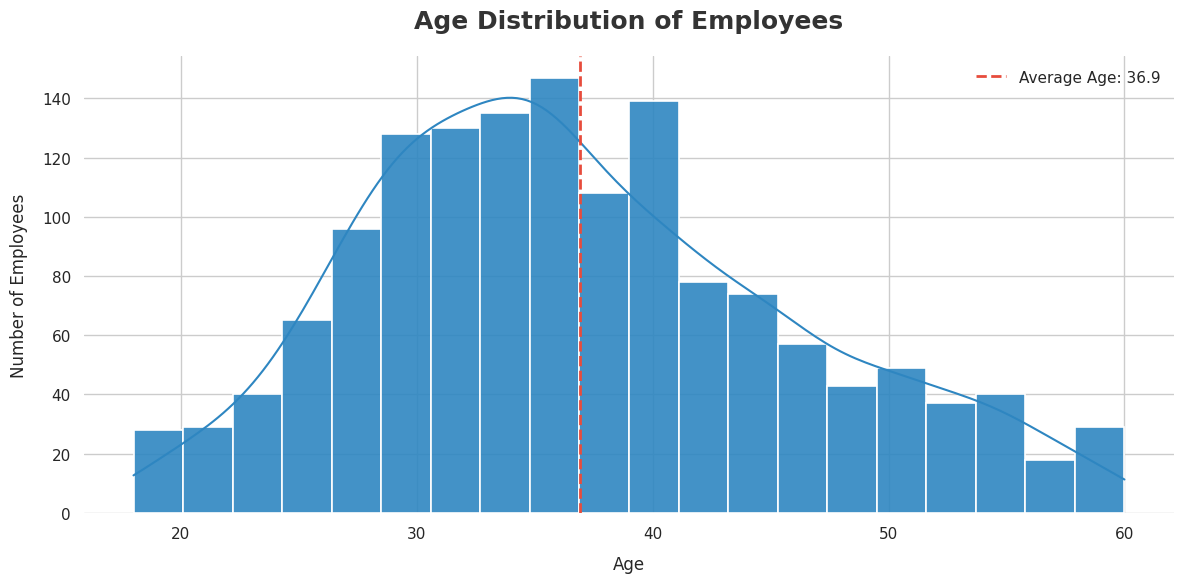

In [849]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

# Plot histogram with KDE
sns.histplot(
    df["Age"],
    bins=20,
    kde=True,
    color="#2E86C1",
    edgecolor="white",
    linewidth=1.2,
    alpha=0.9
)

avg_age = df["Age"].mean()
plt.axvline(
    avg_age,
    color="#E74C3C",
    linestyle="--",
    linewidth=2,
    label=f"Average Age: {avg_age:.1f}"
)

plt.title("Age Distribution of Employees", fontsize=18, weight="bold", pad=20, color="#333333")
plt.xlabel("Age", fontsize=12, labelpad=10)
plt.ylabel("Number of Employees", fontsize=12, labelpad=10)
plt.legend(frameon=False, fontsize=11)
plt.tight_layout()
sns.despine(left=True, bottom=True)
plt.show()

This Correlation Matrix displays the relationships between employee attributes. Strongest positive correlations exist between measures of tenure (e.g., YearsAtCompany, YearsWithCurrManager, TotalWorkingYears) and Age/MonthlyIncome (up to 0.77).

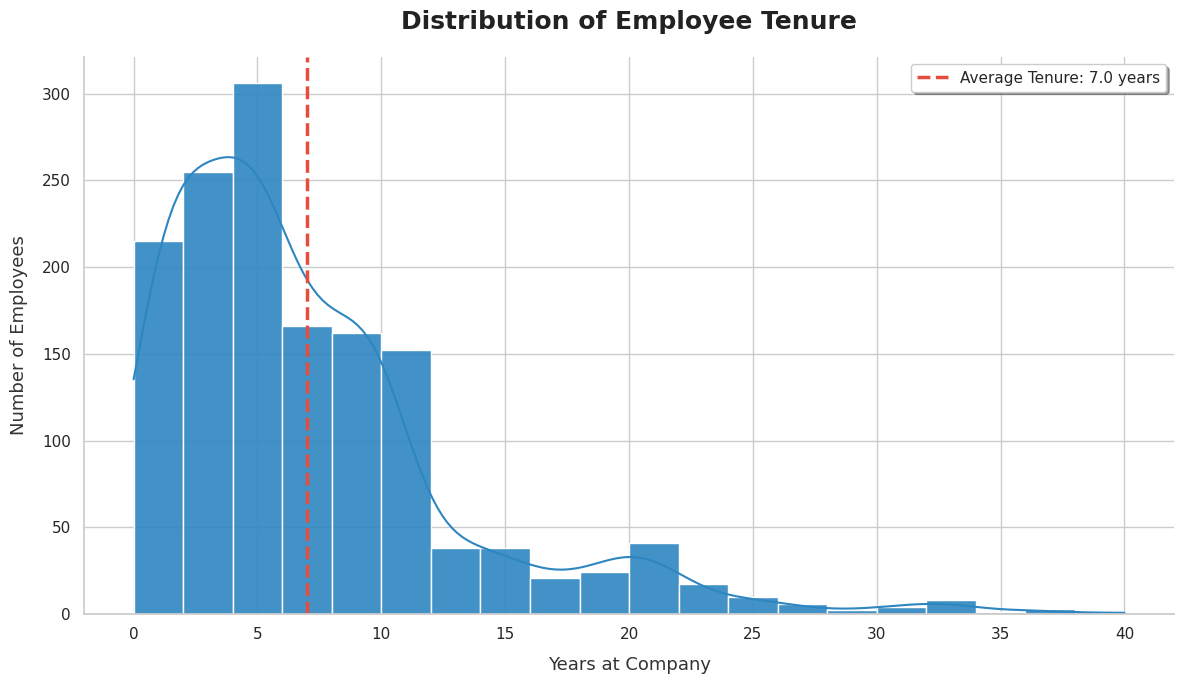

In [850]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

sns.histplot(
    data=df,
    x="YearsAtCompany",
    color="#2E86C1",
    kde=True,
    bins=20,
    edgecolor='white',
    alpha=0.9
)

average_YAC = df["YearsAtCompany"].mean()
plt.axvline(
    average_YAC,
    color="#E74C3C",
    linestyle="--",
    linewidth=2.5,
    label=f"Average Tenure: {average_YAC:.1f} years"
)


plt.title(
    "Distribution of Employee Tenure",
    fontsize=18,
    weight='bold',
    pad=20,
    color='#222222',
    family='DejaVu Sans'
)
plt.xlabel("Years at Company", fontsize=13, labelpad=10, color='#333333')
plt.ylabel("Number of Employees", fontsize=13, labelpad=10, color='#333333')

plt.legend(
    frameon=True,
    shadow=True,
    fontsize=11,
    loc="upper right"
)
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.show()

This histogram shows the distribution of employee tenure, which is heavily skewed to the right, meaning most employees have worked at the company for a relatively short time (peaking around 5 years).

The average tenure is 7.0 years, pulled higher than the peak by a smaller number of employees with long tenures (up to 40 years).

#Advanced Analysis

In [851]:
plot_df['JobLevel'] = pd.Categorical(
    plot_df['JobLevel']
).rename_categories(['Entry Level', 'Mid Level', 'Senior', 'Lead', 'Executive'])

custom_colors = ['#00BFA5', '#2E86C1', '#F4C430', '#E74C3C', '#B2912F']

fig = px.scatter(
    plot_df,
    x='TotalWorkingYears',
    y='MonthlyIncome',
    color='JobLevel',
    size='MonthlyIncome',
    color_discrete_sequence=custom_colors,
    category_orders={'JobLevel': ['Entry Level', 'Mid Level', 'Senior', 'Lead', 'Executive']},
    title="Income Growth with Experience and Job Level",
    hover_data={'MonthlyIncome': ':.0f', 'TotalWorkingYears': True, 'JobLevel': True}
)

fig.update_layout(
    title=dict(
        text="Income Growth with Experience and Job Level",
        x=0.5,
        font=dict(size=22, color='#222', family='Poppins, Arial, sans-serif')
    ),
    xaxis_title='Total Working Years',
    yaxis_title='Monthly Income (USD)',
    yaxis=dict(tickprefix='$'),
    font=dict(size=13, color='#2E2E2E', family='Poppins, Arial, sans-serif'),
    paper_bgcolor='#F9FAFB',
    plot_bgcolor='#F9FAFB',
    legend=dict(
        title='Job Level',
        orientation="h",
        yanchor="bottom",
        y=1.05,
        xanchor="center",
        x=0.5,
        bgcolor='rgba(255,255,255,0.5)',
        bordercolor='rgba(0,0,0,0)',
        font=dict(size=12)
    ),
    margin=dict(l=50, r=40, b=80, t=100),
    height=600
)

fig.update_traces(
    marker=dict(size=12, opacity=0.75, line=dict(width=1.5, color='white')),
    selector=dict(mode='markers')
)

fig.show()

In [852]:
cat_cols = [i for i in df.columns if df[i].nunique() <= 5 or df[i].dtype == object]
corr = df.drop(columns=cat_cols + ['EmployeeNumber'], errors='ignore').corr().round(2)
x, y, z = corr.columns.tolist(), corr.index.tolist(), corr.to_numpy()
fig = ff.create_annotated_heatmap(
    z=z, x=x, y=y, annotation_text=z,
    colorscale='Blues',
    hovertemplate="Correlation between %{x} and %{y} = %{z}<extra></extra>"
)

fig.update_yaxes(autorange="reversed")
fig.update_layout(
    title="Correlation Matrix",
    font_color='#28221D',
    paper_bgcolor='#F9FAFB',
    plot_bgcolor='#F9FAFB',
    margin=dict(t=120),
    height=550
)
fig.show()


Monthly Income is strongly correlated with Total Working Years (r = 0.77), while Years at Company also relates closely to Years with Current Manager (r = 0.77) and Years in Current Role (r = 0.76), with no signs of multicollinearity.

#Preprocessing

In [853]:
num_df = df.select_dtypes(include=[np.number])

skew_vals = num_df.skew().sort_values(ascending=False)

skew_limit = 0.75
skew_cols = skew_vals[skew_vals.abs() > skew_limit]

print("Columns to be log-transformed (sorted by skew):")
print(skew_cols)

# Apply log1p transformation to those columns
df[skew_cols.index] = df[skew_cols.index].apply(np.log1p)


Columns to be log-transformed (sorted by skew):
YearsSinceLastPromotion    1.984290
PerformanceRating          1.921883
YearsAtCompany             1.764529
MonthlyIncome              1.369817
TotalWorkingYears          1.117172
NumCompaniesWorked         1.026471
JobLevel                   1.025401
StockOptionLevel           0.968980
DistanceFromHome           0.958118
YearsInCurrentRole         0.917363
YearsWithCurrManager       0.833451
PercentSalaryHike          0.821128
dtype: float64


Encode the target variable 'Attrition': map 'Yes' to 1 (employee left) and 'No' to 0 (employee stayed)

In [854]:
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

Data Cleaning

In [855]:
# Dropping constant columns that are not needed
columns_to_drop = ['EmployeeCount', 'Over18', 'StandardHours']
df = df.drop(columns=columns_to_drop)

print(f"Dropped columns: {columns_to_drop}\nNew dataframe shape: {df.shape}")

Dropped columns: ['EmployeeCount', 'Over18', 'StandardHours']
New dataframe shape: (1470, 32)
